In [81]:
import eli5
from eli5.sklearn import PermutationImportance
import pandas as pd
import shap 
from sklearn import preprocessing 

# Read the data
X_full = pd.read_csv("cleandata.csv")

# Label encoding team IDs
le = preprocessing.LabelEncoder()
X_full["HOME_TEAM_ID_encoded"] = le.fit_transform(X_full["HOME_TEAM_ID"])
X_full["VISITOR_TEAM_ID_encoded"] = le.transform(X_full["VISITOR_TEAM_ID"])

# Drop old columns
X_full = X_full.drop(columns =[
    "HOME_TEAM_ID","VISITOR_TEAM_ID",
    "GAME_DATE_EST", "PTS_home",
    "PTS_away"], axis=1)

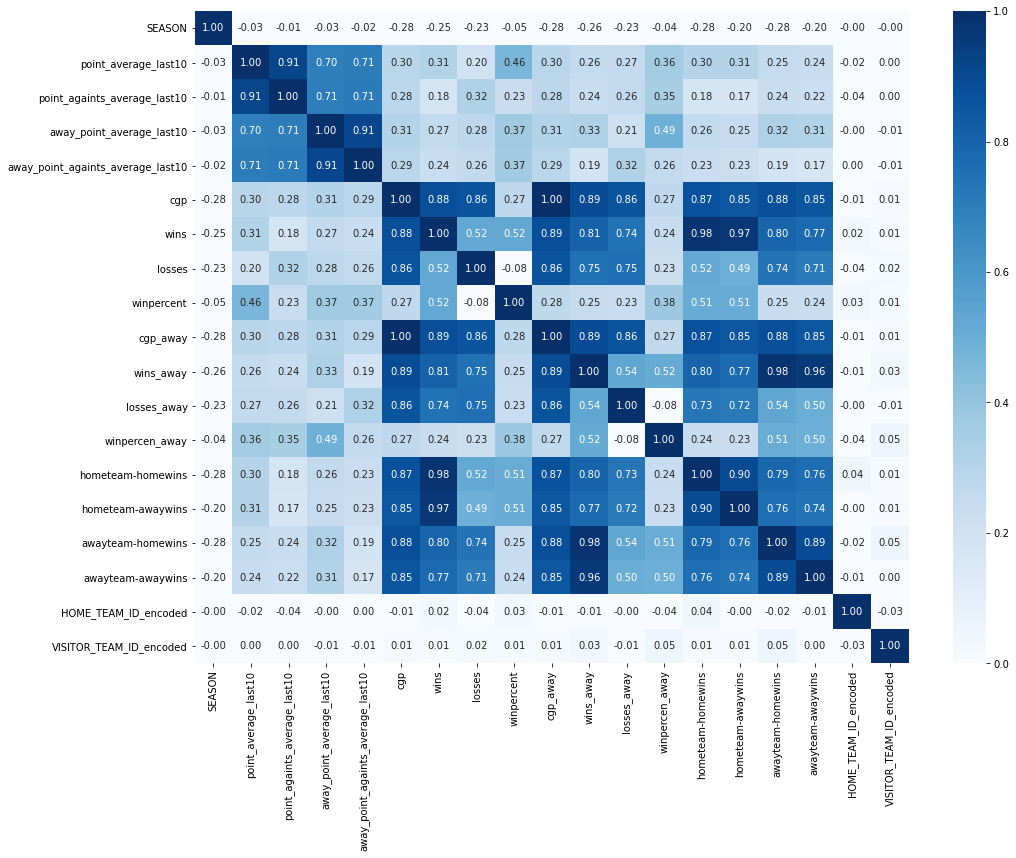

In [75]:
# Alot of these varriable are not needed do to the correlation 
plt.figure(figsize=(16, 12))
sns.heatmap(X_full.drop('point_total', axis=1).corr(),
            cmap="Blues",annot=True, fmt='.2f', vmin=0);

In [157]:
# Columns that have high correlation 
cols_drop = ['cgp','wins','losses','cgp_away',
             'wins_away','losses_away','point_total']

X_full_dropped = X_full.drop(cols_drop, axis=1)

# Splitting the data 
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_full_dropped, 
                                                      y, 
                                                      train_size=0.85, 
                                                      test_size=0.15, 
                                                      random_state=0)

In [158]:
# MAE base RFR model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

rf = RandomForestRegressor(n_estimators=50, 
                           random_state=1).fit(X_train,y_train)

pred_rf = rf.predict(X_valid)

mae_rf = mean_absolute_error(pred_rf, y_valid)
print("mae",mae_rf)

mae 16.546988636363636


In [159]:
#lin reg 
from sklearn.linear_model import LinearRegression 

lin = LinearRegression().fit(X_train,y_train)

pred_lin = lin.predict(X_valid)

mae_lin = mean_absolute_error(pred_lin, y_valid)
print("mae", mae_lin)

mae 17.652993960898808


In [160]:
#DecisionTree
from sklearn import tree

dt = tree.DecisionTreeRegressor().fit(X_train,y_train)

pred_dt = dt.predict(X_valid)

mae_dt = mean_absolute_error(pred_dt, y_valid)
print("mae",mae_dt)

mae 23.81534090909091


In [161]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred_mlp = regr.predict(X_valid)
mae_regr = mean_absolute_error(pred_mlp, y_valid)
print("mae",mae_regr)

mae 17.617674752053617


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.transform(X_train)
scaler.transform(X_valid)

lr = LogisticRegression(random_state=0,max_iter=20).fit(X_train, y_train)
pred_lr = lr.predict(X_valid)
mae_lr = mean_absolute_error(pred_lr, y_valid)
print("mae", mae_lr)

mae 17.71875


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [134]:
X_train.columns

Index(['SEASON', 'point_average_last10', 'point_againts_average_last10',
       'away_point_average_last10', 'away_point_againts_average_last10',
       'winpercent', 'winpercen_away', 'hometeam-homewins',
       'hometeam-awaywins', 'awayteam-homewins', 'awayteam-awaywins',
       'HOME_TEAM_ID_encoded', 'VISITOR_TEAM_ID_encoded'],
      dtype='object')

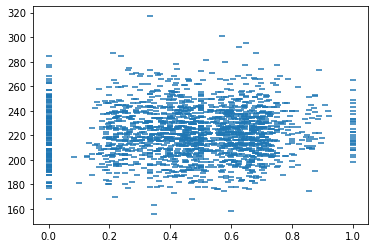

In [152]:
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 

matplotlib.pyplot.scatter(X_train["winpercent"], 
                          y_train, 
                          marker='_')

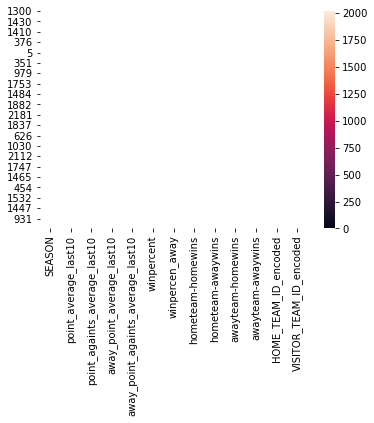

In [138]:
import numpy as np 
import seaborn as sns 
import matplotlib.pylab as plt 
mp = 
ax = sns.heatmap(mp, linewidth=0.5) 
plt.show()

In [155]:
# 80-20 split would only leave 10% of the training data being used from the 2019 season
# Since teams change a lot during the season, we would like to have more data from this season when training
# However we do not was to reduce the power of our validation process
# We will be using a 85-15 train_test_split

# Break off validation set from training data 

# Base model
first_model = RandomForestRegressor().fit(X_train,y_train)
perm = PermutationImportance(first_model, random_state=1).fit(X_valid, y_valid)
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())
eli5.show_weights(perm, feature_names = X_valid.columns.tolist())

#small_val_X = X_valid.iloc[:50]

#explainer = shap.TreeExplainer(first_model)
#shap_values = explainer.shap_values(small_val_X)

#shap.summary_plot(shap_values, small_val_X)

Weight,Feature
0.0734 ± 0.0346,point_average_last10
0.0298 ± 0.0241,away_point_average_last10
0.0287 ± 0.0309,away_point_againts_average_last10
0.0273 ± 0.0233,point_againts_average_last10
0.0138 ± 0.0123,awayteam-awaywins
0.0094 ± 0.0132,HOME_TEAM_ID_encoded
0.0029 ± 0.0125,VISITOR_TEAM_ID_encoded
-0.0006 ± 0.0096,awayteam-homewins
-0.0015 ± 0.0151,winpercen_away
-0.0019 ± 0.0046,hometeam-awaywins


In [156]:
# Obtain target and predictors 
y = X_full.point_total
X = X_full.drop(["point_total"], axis=1)

# What percentage of the data is from this season vs last season 
Lastseason = len(X.loc[X.SEASON == 2018].index)
Thisseason = len(X.loc[X.SEASON == 2019].index)
ratio = round(Thisseason/Lastseason *100,2)
#print ("{} % of the data is from 2018 season".format(ratio))
X_full.info()



guess = pd.read_csv("t1.csv")
cols_drop_g = ['cgp','wins','losses','cgp_away',
             'wins_away','losses_away']
guess = guess.drop(cols_drop_g, axis=1)

data_for_prediction = guess.iloc[0]  # use 1 row of data here. Could use multiple rows if desired
print(data_for_prediction)
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


first_model.predict(data_for_prediction_array)

# Create object that can calculate shap values
explainer = shap.TreeExplainer(first_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SEASON                             2343 non-null   int64  
 1   point_total                        2343 non-null   float64
 2   point_average_last10               2343 non-null   float64
 3   point_againts_average_last10       2343 non-null   float64
 4   away_point_average_last10          2343 non-null   float64
 5   away_point_againts_average_last10  2343 non-null   float64
 6   cgp                                2343 non-null   int64  
 7   wins                               2343 non-null   int64  
 8   losses                             2343 non-null   int64  
 9   winpercent                         2343 non-null   float64
 10  cgp_away                           2343 non-null   int64  
 11  wins_away                          2343 non-null   int64

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [ ]:
#Linear regression 
